In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("Bank Customer Churn Prediction.csv")
data.head(10)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [6]:
data.products_number.max()

4

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Removing irrelvent columns or features

In [8]:
data = data.drop(columns=['country'])

In [9]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [10]:
X.nunique()

customer_id         10000
credit_score          460
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
dtype: int64

In [11]:
categorical_cols=[x for x in X.columns if X[x].dtype=='object']
numeric_cols=[x for x in X.columns if X[x].dtype!='object']

numeric_cols

['customer_id',
 'credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary']

In [12]:
X[numeric_cols].describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [13]:
var=['credit_card','active_member','products_number']
for i in var:
    numeric_cols.remove(i)
    categorical_cols.append(i)


In [14]:
categorical_cols,numeric_cols

(['gender', 'credit_card', 'active_member', 'products_number'],
 ['customer_id',
  'credit_score',
  'age',
  'tenure',
  'balance',
  'estimated_salary'])

<AxesSubplot:>

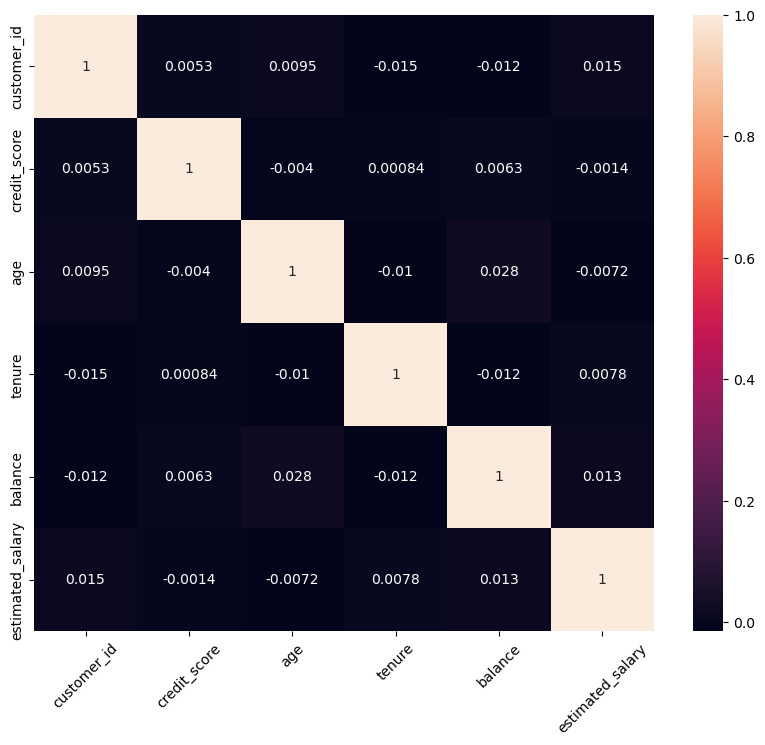

In [15]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.heatmap(X[numeric_cols].corr(),annot=True)

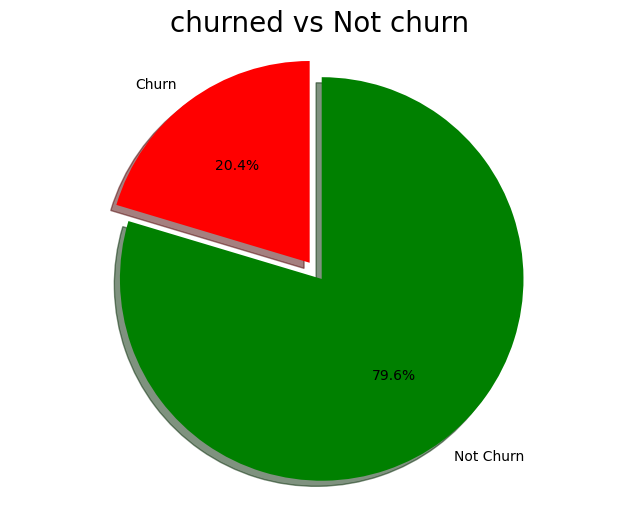

In [16]:
labels = 'Churn', 'Not Churn'
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode,colors=('red','green'),labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("churned vs Not churn", size = 20)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


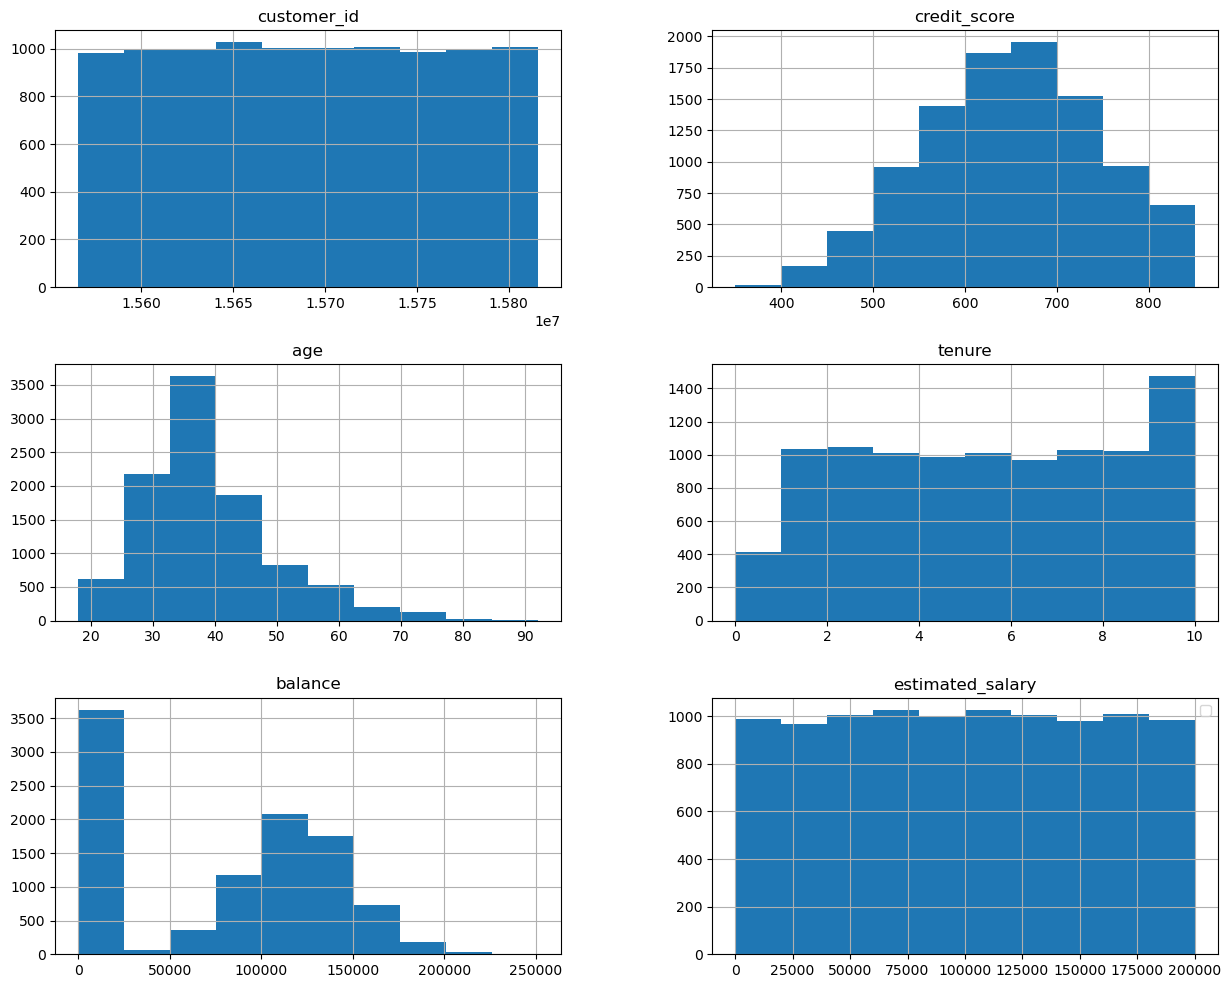

In [17]:
X[numeric_cols].hist(figsize=(15,12))
plt.legend()

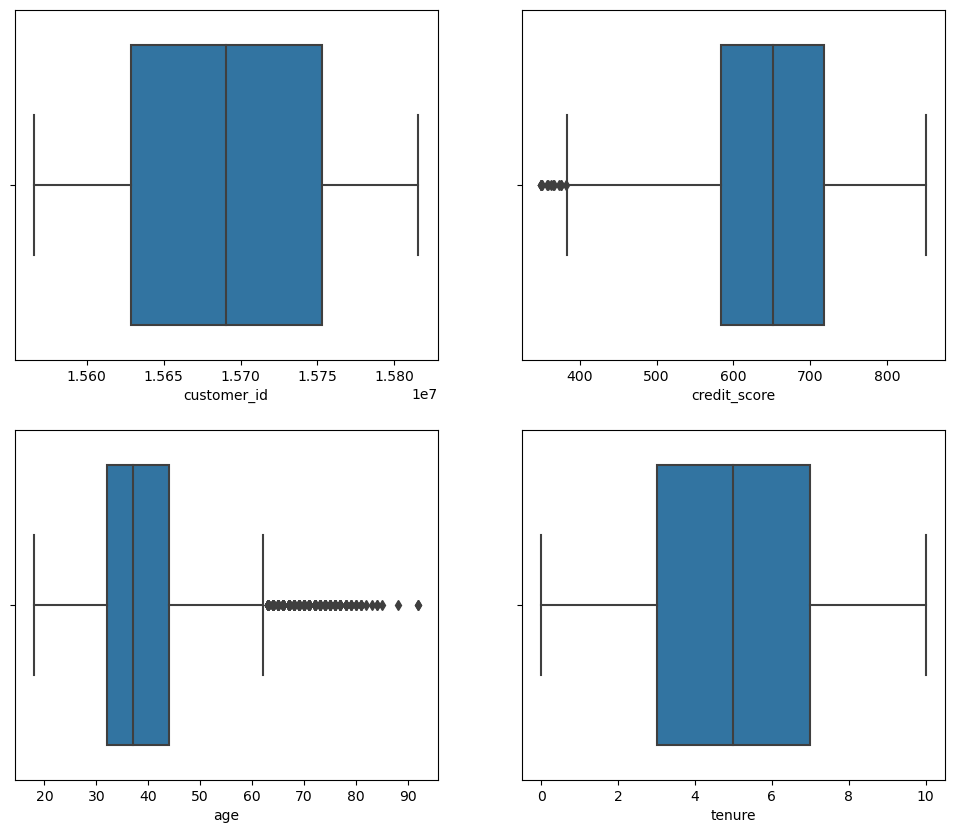

In [18]:
fig,axarr=plt.subplots(2,2,figsize=(12,10))
cnt=0
for i in range(2):
    for j in range(2):
        sns.boxplot(x=numeric_cols[cnt],hue='churn',data=data,ax=axarr[i][j])
        cnt=cnt+1

creditscore  boxplot shows some outliers, let's see this

/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit_score'>

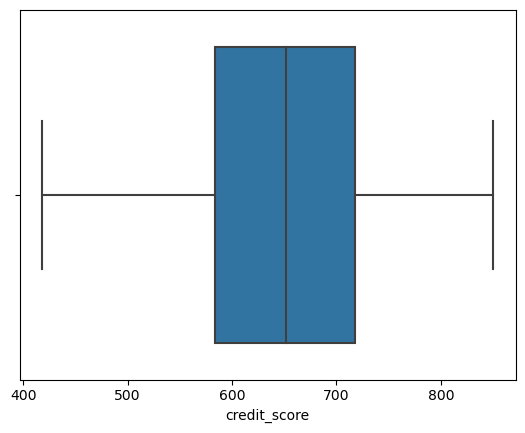

In [19]:
lower=data.credit_score.quantile(q=0.005)
upper=data.credit_score.quantile(q=0.995)
data['credit_score']=np.where(data['credit_score']>upper,upper,np.where(data['credit_score']<lower,lower,data['credit_score']))

sns.boxplot(data['credit_score'])

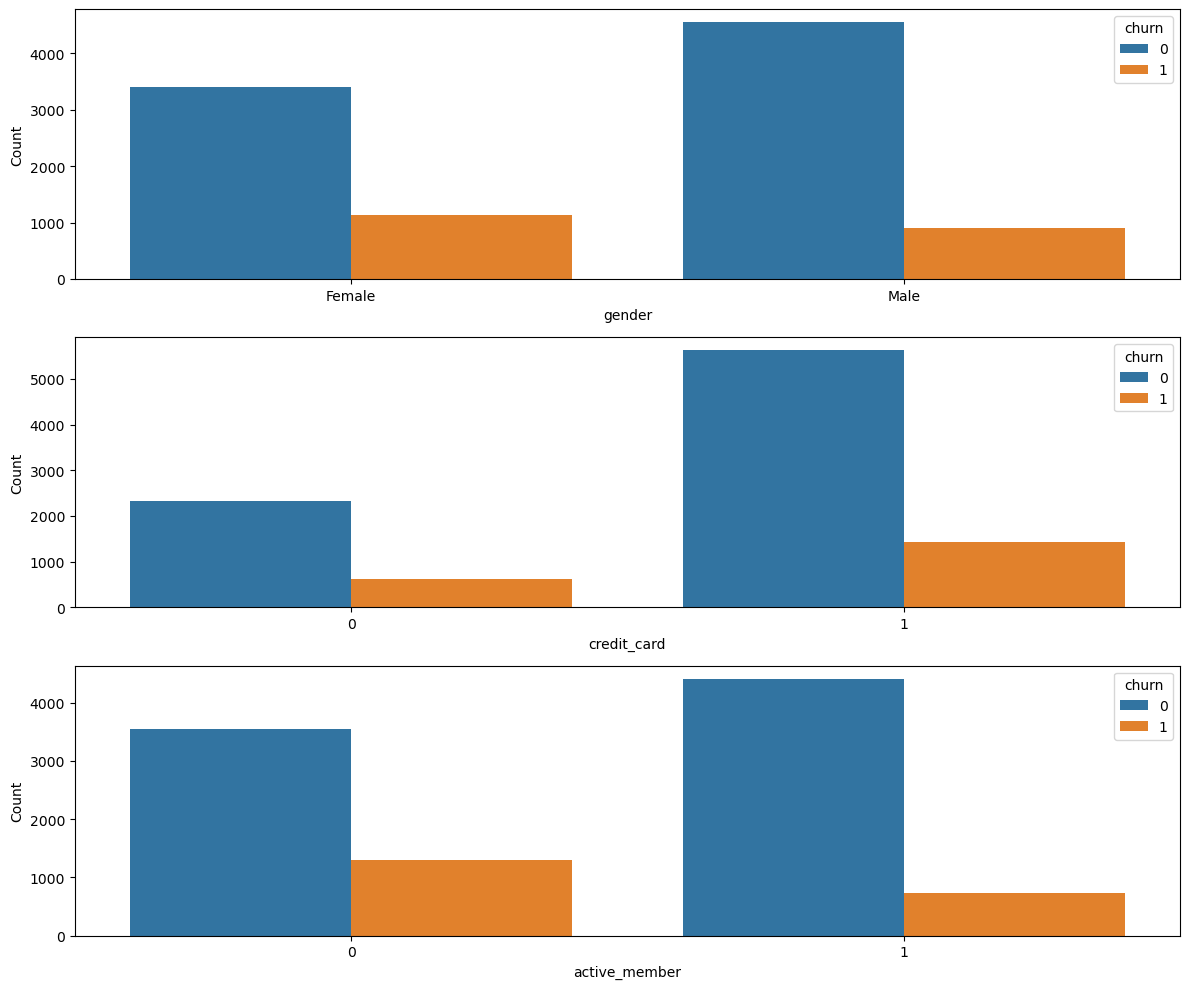

In [20]:
list=['gender','credit_card','active_member']
fig,axarr=plt.subplots(3,1,figsize=(12,10))
cnt=0
for i, category in enumerate(list):
    sns.countplot(x=category, hue='churn', data=data, ax=axarr[i])
    axarr[i].set_xlabel(category)
    axarr[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

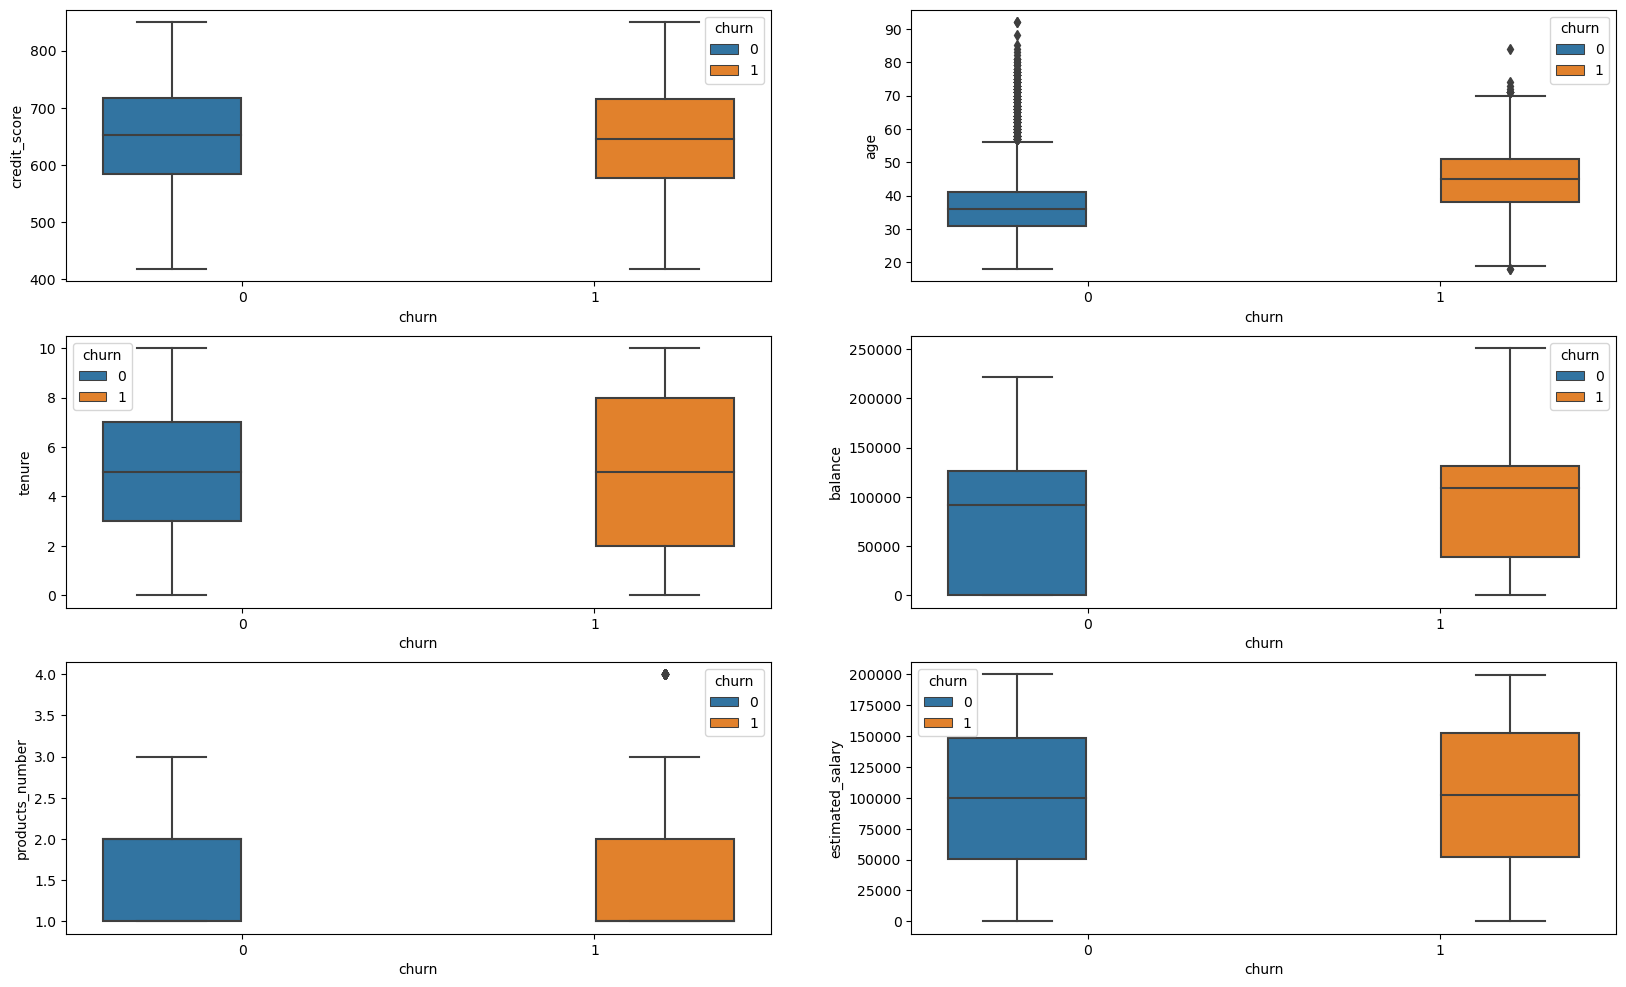

In [21]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='credit_score',x = 'churn', hue = 'churn',data = data, ax=axarr[0][0])
sns.boxplot(y='age',x = 'churn', hue = 'churn',data = data , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'churn', hue = 'churn',data = data, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'churn', hue = 'churn',data = data, ax=axarr[1][1])
sns.boxplot(y='products_number',x = 'churn', hue = 'churn',data = data, ax=axarr[2][0])
sns.boxplot(y='estimated_salary',x = 'churn', hue = 'churn',data = data, ax=axarr[2][1])

In [22]:
data.groupby('products_number')['estimated_salary'].mean()

products_number
1     99487.256851
2    100452.012821
3    104318.130564
4    104763.723333
Name: estimated_salary, dtype: float64

In [23]:
print(pd.pivot_table(data,index='churn',columns='products_number',values='customer_id',aggfunc='count'))

products_number       1       2      3     4
churn                                       
0                3675.0  4242.0   46.0   NaN
1                1409.0   348.0  220.0  60.0



# Feature engineering

 Categorize customers into age groups (e.g., young, middle-aged, senior). This can help capture differences in behavior and risk across different age ranges.

In [24]:
data['age_class'] = np.where(data['age'] <=35, 'young',
                           np.where((data['age'] > 35) & (data['age'] < 55), 'middle_aged',
                                     np.where((data['age'] >= 55), 'senior', data['age']
                                              )
                                        )
                                    )
                           
                      


In [25]:
data['age_class'].value_counts()

middle_aged    4965
young          4153
senior          882
Name: age_class, dtype: int64

In [26]:
print(pd.pivot_table(data,index='churn',columns='age_class',values='customer_id',aggfunc='count'))

age_class  middle_aged  senior  young
churn                                
0                 3617     540   3806
1                 1348     342    347


In [27]:
# data['seniority'] = np.where(data['tenure'] <=2,'new',
#                            np.where((data['tenure'] >2) & (data['tenure'] <=6 ), 'intermediate',
#                                      np.where((data['tenure'] >6 ), 'long-standing', data['tenure']
#                                               )
#                                         ))
                            

In [28]:
# print(pd.pivot_table(data,index='churn',columns='seniority',values='customer_id',aggfunc='count'))

In [44]:
data_train = data.sample(frac=0.85,random_state=41)
data_test = data.drop(data_train.index)
print(len(data_train))

print(len(data_test))

8500
1500


In [45]:
data_test

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_class
0,15634602,619.0,Female,42,2,0.00,1,1,1,101348.88,1,middle_aged
3,15701354,699.0,Female,39,1,0.00,2,0,0,93826.63,0,middle_aged
12,15632264,476.0,Female,34,10,0.00,2,1,0,26260.98,0,young
26,15736816,756.0,Male,36,2,136815.64,1,1,1,170041.95,0,middle_aged
30,15589475,591.0,Female,39,3,0.00,3,1,0,140469.38,1,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...
9945,15674000,645.0,Male,44,10,0.00,2,0,1,166707.22,0,middle_aged
9961,15566543,573.0,Male,44,9,0.00,2,1,0,107124.17,0,middle_aged
9970,15587133,518.0,Male,42,7,151027.05,2,1,0,119377.36,0,middle_aged
9972,15747927,758.0,Male,26,4,155739.76,1,1,0,171552.02,0,young


In [46]:
# data_train['balance_salaryRatio'] = data_train.balance/data_train.estimated_salary
# sns.boxplot(y='balance_salaryRatio',x = 'churn', hue = 'churn',data = data_train)
# plt.ylim(-1, 5)

In [47]:
print(pd.pivot_table(data,index='churn',columns='age_class',values='customer_id',aggfunc='count'))

age_class  middle_aged  senior  young
churn                                
0                 3617     540   3806
1                 1348     342    347


we saw that the salary has little effect on the probability of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more.

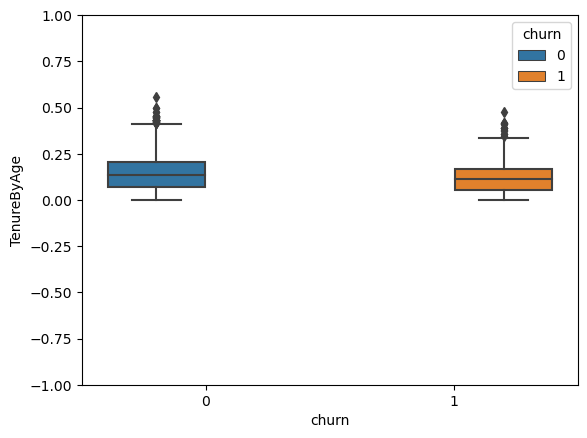

In [48]:
data_train['TenureByAge'] = data_train.tenure/(data_train.age)
sns.boxplot(y='TenureByAge',x = 'churn', hue = 'churn',data = data_train)
plt.ylim(-1, 1)
plt.show()



/home/boss/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TenureByAge', ylabel='Density'>

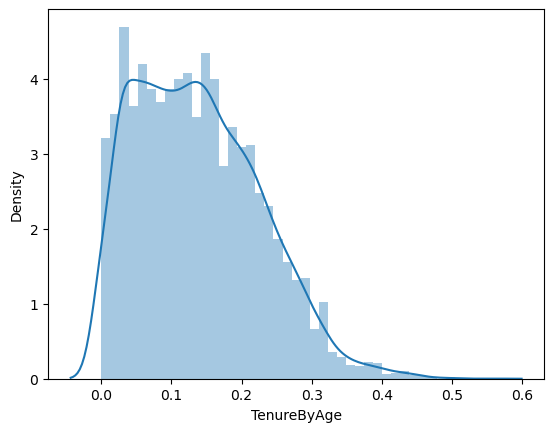

In [49]:
sns.distplot(data_train['TenureByAge'])

Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:

In [50]:
data_train['CreditScoreGivenAge'] = data_train.credit_score/(data_train.age)

<AxesSubplot:xlabel='churn', ylabel='CreditScoreGivenAge'>

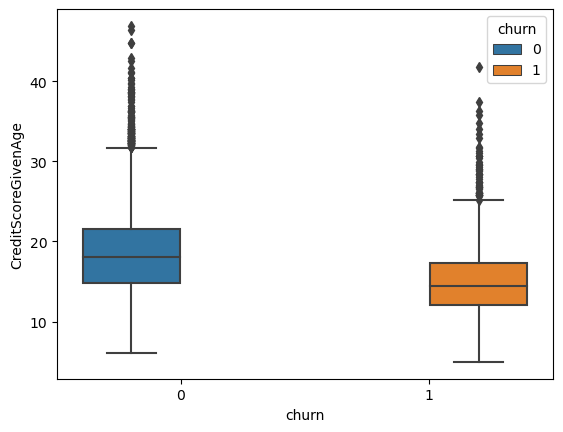

In [51]:
sns.boxplot(y='CreditScoreGivenAge',x='churn',hue='churn',data=data_train)


Lastly we introduce a variable to capture credit score given age to take into account credit behavior

In [52]:
data_train.head().columns

Index(['customer_id', 'credit_score', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'age_class', 'TenureByAge', 'CreditScoreGivenAge'],
      dtype='object')

In [53]:
# numeric_cols=['credit_score','age','tenure','balance','products_number','estimated_salary','balance_salaryRatio','TenureByAge','CreditScoreGivenAge']
# categorical_cols=['credit_card','active_member','country','gender','age_class','seniority']
numeric_cols=['credit_score','age','tenure','balance','products_number','estimated_salary','TenureByAge','CreditScoreGivenAge']
# categorical_cols=['credit_card','active_member','gender','age_class','seniority']
categorical_cols=['credit_card','active_member','gender','age_class']
data_train = data_train[['churn'] + numeric_cols + categorical_cols]
data_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,TenureByAge,CreditScoreGivenAge,credit_card,active_member,gender,age_class
9745,0,818.0,36,4,0.00,2,8037.03,0.111111,22.722222,1,1,Male,middle_aged
4492,0,590.0,32,0,127763.24,1,100717.54,0.000000,18.437500,1,0,Female,young
3439,0,746.0,36,7,142400.77,1,193438.69,0.194444,20.722222,1,1,Male,middle_aged
6077,0,660.0,37,2,133200.09,1,71433.88,0.054054,17.837838,0,0,Female,middle_aged
5372,0,598.0,39,5,0.00,2,83103.46,0.128205,15.333333,1,1,Female,middle_aged


For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0

In [54]:
data_train.loc[data_train.credit_card == 0, 'credit_card'] = -1
data_train.loc[data_train.active_member == 0, 'active_member'] = -1
data_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,TenureByAge,CreditScoreGivenAge,credit_card,active_member,gender,age_class
9745,0,818.0,36,4,0.00,2,8037.03,0.111111,22.722222,1,1,Male,middle_aged
4492,0,590.0,32,0,127763.24,1,100717.54,0.000000,18.437500,1,-1,Female,young
3439,0,746.0,36,7,142400.77,1,193438.69,0.194444,20.722222,1,1,Male,middle_aged
6077,0,660.0,37,2,133200.09,1,71433.88,0.054054,17.837838,-1,-1,Female,middle_aged
5372,0,598.0,39,5,0.00,2,83103.46,0.128205,15.333333,1,1,Female,middle_aged


In [55]:
remove =[]
for i in categorical_cols:
    if (data_train[i].dtype == 'str' or data_train[i].dtype == 'object'):
        for j in data_train[i].unique():
            data_train[i+'_'+j] = np.where(data_train[i] == j,1,-1)
        remove.append(i)
data_train = data_train.drop(remove, axis=1)
data_train.head()


,churn,credit_score,age,tenure,balance,products_number,estimated_salary,TenureByAge,CreditScoreGivenAge,credit_card,active_member,gender_Male,gender_Female,age_class_middle_aged,age_class_young,age_class_senior
9745,0,818.0,36,4,0.00,2,8037.03,0.111111,22.722222,1,1,1,-1,1,-1,-1
4492,0,590.0,32,0,127763.24,1,100717.54,0.000000,18.437500,1,-1,-1,1,-1,1,-1
3439,0,746.0,36,7,142400.77,1,193438.69,0.194444,20.722222,1,1,1,-1,1,-1,-1
6077,0,660.0,37,2,133200.09,1,71433.88,0.054054,17.837838,-1,-1,-1,1,1,-1,-1
5372,0,598.0,39,5,0.00,2,83103.46,0.128205,15.333333,1,1,-1,1,1,-1,-1


In [56]:
# minVec = data_train[numeric_cols].min().copy()
# maxVec = data_train[numeric_cols].max().copy()
# data_train[numeric_cols] = (data_train[numeric_cols]-minVec)/(maxVec-minVec)
# data_train.columns

from sklearn.preprocessing import MinMaxScaler
# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaler.fit(data_train[numeric_cols])
data_train[numeric_cols]= scaler.transform(data_train[numeric_cols])
# scaled_data now contains the scaled values



In [57]:
data_train.columns


Index(['churn', 'credit_score', 'age', 'tenure', 'balance', 'products_number',
       'estimated_salary', 'TenureByAge', 'CreditScoreGivenAge', 'credit_card',
       'active_member', 'gender_Male', 'gender_Female',
       'age_class_middle_aged', 'age_class_young', 'age_class_senior'],
      dtype='object')

In [58]:
# data prep pipeline for test data
def dataTestPipeline(df_predict,df_train_Cols):

#     df_predict['balance_salaryRatio'] = df_predict.balance/df_predict.estimated_salary
    df_predict['TenureByAge'] = df_predict.tenure/(df_predict.age)
    df_predict['CreditScoreGivenAge'] = df_predict.credit_score/(df_predict.age)

#     continuous_vars = ['credit_score','age','tenure','balance','products_number','estimated_salary','balance_salaryRatio',
#                    'TenureByAge','CreditScoreGivenAge']
#     cat_vars = ['credit_card','active_member',"country", "gender","age_class","seniority"]
    continuous_vars = ['credit_score','age','tenure','balance','products_number','estimated_salary',
                   'TenureByAge','CreditScoreGivenAge']
#     cat_vars = ['credit_card','active_member', "gender","age_class","seniority"]
    cat_vars = ['credit_card','active_member', "gender","age_class"]

    df_predict = df_predict[['churn'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.credit_card == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.active_member == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
#     lst = [ "gender","age_class","seniority"]
    lst = [ "gender","age_class"]
    remove = []
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
#     # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = [set(df_train_Cols) - set(df_predict.columns)]
    print(L)
    for l in L:
        df_predict[str(l)] = -1        

#     df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    df_predict[continuous_vars] =scaler.transform(df_predict[continuous_vars])

    df_predict = df_predict[df_train_Cols]
    return df_predict

data_test = dataTestPipeline(data_test,data_train.columns)

[set()]


In [59]:
# import joblib

# joblib.dump(scaler, 'your_scaler.pkl')
scaler.data_min_

array([418.        ,  18.        ,   0.        ,   0.        ,
         1.        ,  11.58      ,   0.        ,   4.97619048])

In [48]:
# data_test = dataTestPipeline(data_test,data_train.columns,minVec,maxVec)
# data_test = data_test.mask(np.isinf(data_test))
# data_test = data_test.dropna()
data_test.min()


churn                    0.000000
credit_score             0.000000
age                      0.000000
tenure                   0.000000
balance                  0.000000
products_number          0.000000
estimated_salary         0.000392
TenureByAge              0.000000
CreditScoreGivenAge      0.020360
credit_card              0.000000
active_member            0.000000
gender_Male             -1.000000
gender_Female           -1.000000
age_class_middle_aged   -1.000000
age_class_young         -1.000000
age_class_senior        -1.000000
dtype: float64

In [60]:
data_train.head()

,churn,credit_score,age,tenure,balance,products_number,estimated_salary,TenureByAge,CreditScoreGivenAge,credit_card,active_member,gender_Male,gender_Female,age_class_middle_aged,age_class_young,age_class_senior
9745,0,0.925926,0.243243,0.4,0.000000,0.333333,0.040131,0.200000,0.423405,1,1,1,-1,1,-1,-1
4492,0,0.398148,0.189189,0.0,0.509224,0.000000,0.503578,0.000000,0.321175,1,-1,-1,1,-1,1,-1
3439,0,0.759259,0.243243,0.7,0.567564,0.000000,0.967228,0.350000,0.375686,1,1,1,-1,1,-1,-1
6077,0,0.560185,0.256757,0.2,0.530893,0.000000,0.357146,0.097297,0.306868,-1,-1,-1,1,1,-1,-1
5372,0,0.416667,0.283784,0.5,0.000000,0.333333,0.415499,0.230769,0.247112,1,1,-1,1,1,-1,-1


In [61]:
x_train=data_train.iloc[:,1:]
y_train=data_train.iloc[:,0]

In [62]:
x_train

,credit_score,age,tenure,balance,products_number,estimated_salary,TenureByAge,CreditScoreGivenAge,credit_card,active_member,gender_Male,gender_Female,age_class_middle_aged,age_class_young,age_class_senior
9745,0.925926,0.243243,0.4,0.000000,0.333333,0.040131,0.200000,0.423405,1,1,1,-1,1,-1,-1
4492,0.398148,0.189189,0.0,0.509224,0.000000,0.503578,0.000000,0.321175,1,-1,-1,1,-1,1,-1
3439,0.759259,0.243243,0.7,0.567564,0.000000,0.967228,0.350000,0.375686,1,1,1,-1,1,-1,-1
6077,0.560185,0.256757,0.2,0.530893,0.000000,0.357146,0.097297,0.306868,-1,-1,-1,1,1,-1,-1
5372,0.416667,0.283784,0.5,0.000000,0.333333,0.415499,0.230769,0.247112,1,1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0.791667,0.283784,0.6,0.711785,0.000000,0.335631,0.276923,0.346219,1,-1,1,-1,1,-1,-1
2519,0.449074,0.594595,0.0,0.665715,0.333333,0.964494,0.000000,0.116785,1,1,-1,1,-1,-1,1
7242,0.569444,0.351351,0.7,0.308997,0.666667,0.286662,0.286364,0.241328,-1,-1,1,-1,1,-1,-1
1530,0.446759,0.108108,0.2,0.428496,0.333333,0.604008,0.138462,0.441962,1,1,-1,1,-1,1,-1


In [63]:
x_test=data_test.iloc[:,1:]
y_test=data_test.iloc[:,0]


In [64]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [65]:
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix


Naive Bayes Model

In [66]:
classifier = GaussianNB()
param_grid = {
    'var_smoothing': [1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)

# Perform the hyperparameter tuning on the training data
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



In [67]:
best_params

{'var_smoothing': 1e-07}

In [68]:
# custom_priors = [0.21, 0.79] 
classifierGNB = GaussianNB(var_smoothing=1e-07)
classifierGNB.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-07)

In [69]:
scores=cross_val_score(classifierGNB,x_train,y_train,cv=5,scoring='f1')
scores

array([0.54025974, 0.52767053, 0.5083014 , 0.52281134, 0.48074369])

In [59]:
resGNB=classifierGNB.predict(x_test)
correct_predictions = sum(p == t for p, t in zip(resGNB, y_test))

# Calculate the total number of predictions
total_predictions = y_test.shape[0]

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print("Correct Predictions:", correct_predictions)
print("Total Predictions:", total_predictions)
print("Accuracy:", accuracy)




Correct Predictions: 1180
Total Predictions: 1500
Accuracy: 0.7866666666666666


<Axes: >

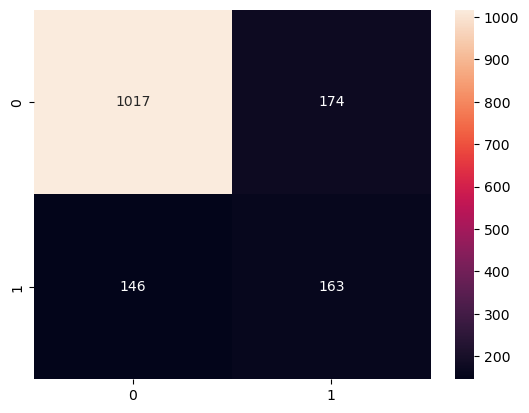

In [60]:
sns.heatmap(confusion_matrix(y_test,resGNB),annot=True,fmt='d')

In [70]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [800,1000,1200,1500],'intercept_scaling':[1],'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001],'solver':['sag','newton-cg','lbfgs']}
log_primal_Grid = GridSearchCV(LogisticRegression(),param_grid, cv=5, verbose=1,n_jobs=-1,scoring='f1')
log_primal_Grid.fit(x_train,y_train)
best_model(log_primal_Grid)

In [ ]:
ModelLogistic=LogisticRegression(C=0.1, max_iter=800, tol=1e-05)
ModelLogistic.fit(x_train,y_train)

In [ ]:
# logpr=log_primal_Grid.predict(x_test)
scores=ModelLogistic.predict(x_train)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))


In [ ]:
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [ ]:
Logisticres=ModelLogistic.predict(x_test)
sns.heatmap(confusion_matrix(y_test,Logisticres),annot=True,fmt='d')

In [ ]:
correct_predictions = sum(p == t for p, t in zip(scores, y_test))

# Calculate the total number of predictions
total_predictions = y_test.shape[0]

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print("Correct Predictions:", correct_predictions)
print("Total Predictions:", total_predictions)
print("Accuracy:", accuracy)


In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,0.5,1,10], 'max_iter': [800,1000],'intercept_scaling':[1],'penalty':['l1'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(x_train)
# Create the logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create a GridSearchCV object
log_pol2_Grid = GridSearchCV(logistic_regression, param_grid, cv=3, refit=True, verbose=1,n_jobs=-1,scoring='f1')

# Fit the model on the polynomial features
log_pol2_Grid.fit(df_train_pol2, y_train)
best_model(log_pol2_Grid)


In [ ]:
mod2LGR=LogisticRegression(C=10, max_iter=800, penalty='l1', solver='liblinear',tol=1e-06)
mod2LGR.fit(df_train_pol2, y_train)

In [ ]:
scores=mod2LGR.predict(df_train_pol2)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))


In [71]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,0.5,1,10], 'max_iter': [800,1000,1200],'intercept_scaling':[1],'penalty':['l1'],
              'tol':[0.0001,0.000001]}
poly3 = PolynomialFeatures(degree=3)
df_train_pol3 = poly3.fit_transform(x_train)
# Create the logistic regression model
logistic_regression = LogisticRegression(solver='liblinear')

# Create a GridSearchCV object
log_pol3_Grid = GridSearchCV(logistic_regression, param_grid, cv=3, refit=True, verbose=1,n_jobs=-1,scoring='f1')

# Fit the model on the polynomial features
log_pol3_Grid.fit(df_train_pol3, y_train)
best_model(log_pol3_Grid)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.5422520622346735
{'C': 10, 'intercept_scaling': 1, 'max_iter': 800, 'penalty': 'l1', 'tol': 0.0001}
LogisticRegression(C=10, max_iter=800, penalty='l1', solver='liblinear')


In [72]:

# Create the logistic regression model

mod3LGR=LogisticRegression(C=10, max_iter=800, penalty='l1', solver='liblinear')
mod3LGR.fit(df_train_pol3, y_train)

LogisticRegression(C=10, max_iter=800, penalty='l1', solver='liblinear')

In [73]:
x_train

,credit_score,age,tenure,balance,products_number,estimated_salary,TenureByAge,CreditScoreGivenAge,credit_card,active_member,gender_Male,gender_Female,age_class_middle_aged,age_class_young,age_class_senior
9745,0.925926,0.243243,0.4,0.000000,0.333333,0.040131,0.200000,0.423405,1,1,1,-1,1,-1,-1
4492,0.398148,0.189189,0.0,0.509224,0.000000,0.503578,0.000000,0.321175,1,-1,-1,1,-1,1,-1
3439,0.759259,0.243243,0.7,0.567564,0.000000,0.967228,0.350000,0.375686,1,1,1,-1,1,-1,-1
6077,0.560185,0.256757,0.2,0.530893,0.000000,0.357146,0.097297,0.306868,-1,-1,-1,1,1,-1,-1
5372,0.416667,0.283784,0.5,0.000000,0.333333,0.415499,0.230769,0.247112,1,1,-1,1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0.791667,0.283784,0.6,0.711785,0.000000,0.335631,0.276923,0.346219,1,-1,1,-1,1,-1,-1
2519,0.449074,0.594595,0.0,0.665715,0.333333,0.964494,0.000000,0.116785,1,1,-1,1,-1,-1,1
7242,0.569444,0.351351,0.7,0.308997,0.666667,0.286662,0.286364,0.241328,-1,-1,1,-1,1,-1,-1
1530,0.446759,0.108108,0.2,0.428496,0.333333,0.604008,0.138462,0.441962,1,1,-1,1,-1,1,-1


In [74]:
scores1=mod3LGR.predict_proba(df_train_pol3)
# scores
# print(f1_score(scores1,y_train),recall_score(scores1,y_train),precision_score(scores1,y_train))



In [109]:
import joblib
joblib.dump(svmrbf, 'logisticregressiondegree3.pkl')

['logisticregressiondegree3.pkl']

In [75]:
scores1

array([[0.97454829, 0.02545171],
       [0.82833212, 0.17166788],
       [0.96187621, 0.03812379],
       ...,
       [0.0311348 , 0.9688652 ],
       [0.97731962, 0.02268038],
       [0.90074628, 0.09925372]])

In [76]:
binary_predictions = (scores1[:, 1] >= 0.30).astype(int)

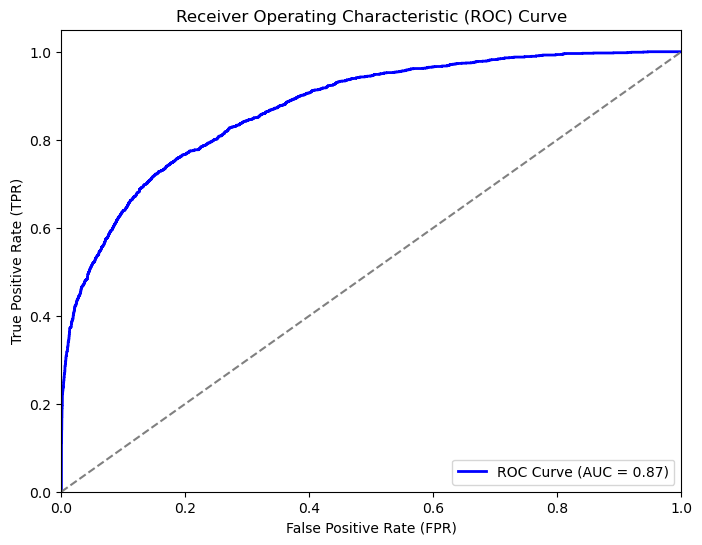

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your logistic regression model (log_pol2_Grid) trained and the test data (x_test, y_test)
# Get predicted probabilities for the positive class (class 1)
predicted_probabilities = mod3LGR.predict_proba(df_train_pol3)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_train, predicted_probabilities)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_train, predicted_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


0.6297731045932484 0.6033934252386002 0.6585648148148148


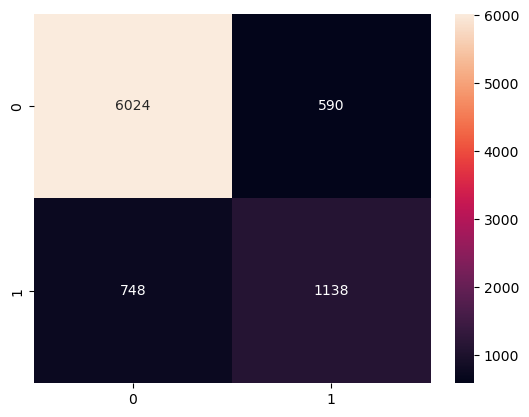

In [78]:
sns.heatmap(confusion_matrix(binary_predictions,y_train),annot=True,fmt='d')
print(f1_score(binary_predictions,y_train),recall_score(binary_predictions,y_train),precision_score(binary_predictions,y_train))



In [ ]:
# Transform test data with the same polynomial features
df_test_pol2 = poly2.transform(x_test)

# Make predictions on the test data
predictions = log_pol2_Grid.predict(df_test_pol2)

In [ ]:
sns.heatmap(confusion_matrix(predictions,y_test),annot=True,fmt='d')

In [ ]:
# Transform test data with the same polynomial features
df_test_pol3 = poly3.transform(x_test)

# Make predictions on the test data
predictions = log_pol3_Grid.predict_proba(df_test_pol3)

In [ ]:
binary_predictionsTest = (predictions[:, 1] >= 0.3).astype(int)

In [ ]:
sns.heatmap(confusion_matrix(binary_predictionsTest,y_test),annot=True,fmt='d')

In [ ]:
print(f1_score(binary_predictionsTest,y_test),recall_score(binary_predictionsTest,y_test),precision_score(binary_predictionsTest,y_test))


In [ ]:
scores=log_pol2_Grid.predict(x_train)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [79]:
# Fit SVM with pol kernel
param_grid = {'C': [1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[3,4] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=1,n_jobs=-1,scoring='f1')
SVM_grid.fit(x_train,y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100], 'degree': [3, 4],
                         'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly'],
                         'probability': [True]},
             scoring='f1', verbose=1)

In [70]:
best_model(SVM_grid)

0.5169072873182212
{'C': 100, 'degree': 4, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=4, gamma=0.1, kernel='poly', probability=True)


In [71]:
SVM3poly=SVC(C=100, degree=4, gamma=0.1, kernel='poly', probability=True)
SVM3poly.fit(x_train,y_train)

SVC(C=100, degree=4, gamma=0.1, kernel='poly', probability=True)

0.5357841220179898 0.8262967430639324 0.39641203703703703


<Axes: >

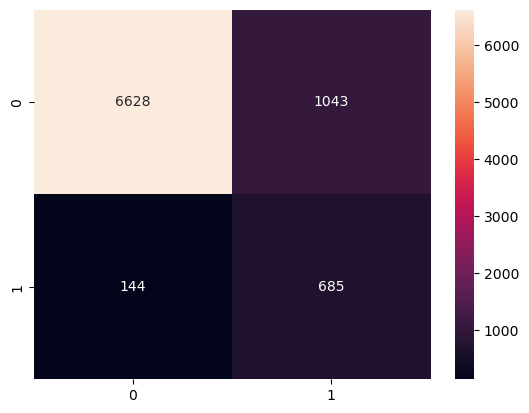

In [72]:
scores=SVM3poly.predict(x_train)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [ ]:
predsvmpoly=SVM3poly.predict(x_test)
# correct_predictions = sum(p == t for p, t in zip(svmres, y_test))

# # Calculate the total number of predictions
# total_predictions = y_test.shape[0]

# # Calculate the accuracy
# accuracy = correct_predictions / total_predictions

# print("Correct Predictions:", correct_predictions)
# print("Total Predictions:", total_predictions)
# print("Accuracy:", accuracy)
sns.heatmap(confusion_matrix(predsvmpoly,y_test),annot=True,fmt='d')

In [82]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,1,10,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=1,n_jobs=-1,scoring='f1')
svm_grid.fit(x_train,y_train)
best_model(svm_grid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0.5139048013972213
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [83]:
svmrbf=SVC(C=100, gamma=0.1, probability=True)
svmrbf.fit(x_train,y_train)

SVC(C=100, gamma=0.1, probability=True)

In [ ]:
import joblib
joblib.dump(svmrbf, 'SVM_rbf.pkl')

In [107]:
svmprob=(svmrbf.predict_proba(x_train)[:, 1] >= 0.30).astype(int)

0.5734072022160664 0.7137931034482758 0.4791666666666667


<AxesSubplot:>

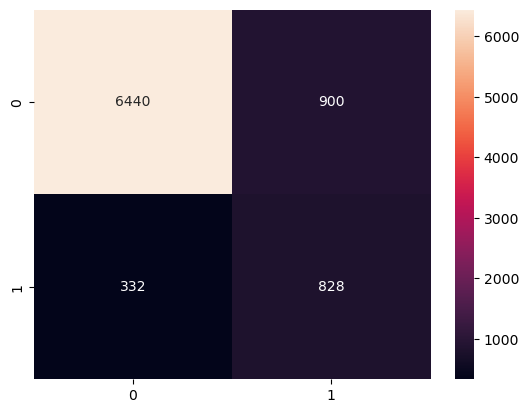

In [108]:

# scores
print(f1_score(svmprob,y_train),recall_score(svmprob,y_train),precision_score(svmprob,y_train))
sns.heatmap(confusion_matrix(svmprob,y_train),annot=True,fmt='d')

In [ ]:
predsvmrbf=svmrbf.predict(x_test)

sns.heatmap(confusion_matrix(predsvmrbf,y_test),annot=True,fmt='d')

In [80]:
param_grid = {'max_depth': [5, 6, 7, 8,10],'n_estimators':[100,120,150],'min_samples_split': [5, 6, 7],'max_features':['auto','log2'],'max_leaf_nodes':[8,10,12],'max_samples':[0.8]}
RanFor_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=True), param_grid, cv=5, verbose=1,scoring='f1')
RanFor_grid.fit(x_train,y_train)
best_model(RanFor_grid)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
0.44770294358659984
{'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 12, 'max_samples': 0.8, 'min_samples_split': 6, 'n_estimators': 100}
RandomForestClassifier(max_depth=7, max_features='log2', max_leaf_nodes=12,
                       max_samples=0.8, min_samples_split=6, n_jobs=-1,
                       oob_score=True)


In [ ]:
RanFor_Grid=RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=12,
                       max_samples=0.8, min_samples_split=5, n_estimators=150,
                       n_jobs=-1, oob_score=True)
RanFor_Grid.fit(x_train,y_train)
oob_score = RanFor_Grid.oob_score_
print("OOB Score:", oob_score)

In [ ]:
scores=RanFor_Grid.predict(x_train)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [81]:
param_grid = {'max_depth': [ 6, 7, 8,10,12],'n_estimators':[100,150],'min_samples_split': [5, 6, 7],'max_features':['auto','log2'],'max_leaf_nodes':[8,10,12,14],'max_samples':[0.8]}
RanFor_rancv=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=True),param_grid,n_iter=100,cv=5,n_jobs=-1,verbose=1)
RanFor_rancv.fit(x_train,y_train)
best_model(RanFor_rancv)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
0.8489411764705883
{'n_estimators': 150, 'min_samples_split': 5, 'max_samples': 0.8, 'max_leaf_nodes': 14, 'max_features': 'auto', 'max_depth': 12}
RandomForestClassifier(max_depth=12, max_leaf_nodes=14, max_samples=0.8,
                       min_samples_split=5, n_estimators=150, n_jobs=-1,
                       oob_score=True)


In [84]:
RanFor_Rancv=RandomForestClassifier(max_depth=12, max_leaf_nodes=14, max_samples=0.8,
                       min_samples_split=5, n_estimators=150, n_jobs=-1,
                       oob_score=True)
RanFor_Rancv.fit(x_train,y_train)
oob_score = RanFor_Rancv.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.8464705882352941


0.46193109315185027 0.8715890850722311 0.3142361111111111


<AxesSubplot:>

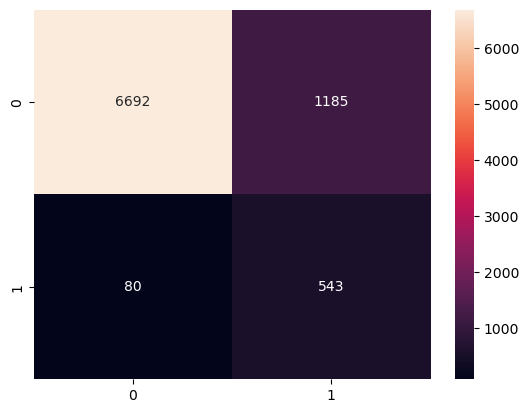

In [85]:
scores=RanFor_Rancv.predict(x_train)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [ ]:
scores=RanFor_grid.predict(x_train)
# scores
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [ ]:
pred=RanFor_grid.predict(x_test)
correct_predictions = sum(p == t for p, t in zip(pred, y_test))

# Calculate the total number of predictions
total_predictions = y_test.shape[0]

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print("Correct Predictions:", correct_predictions)
print("Total Predictions:", total_predictions)
print("Accuracy:", accuracy)


In [86]:
pip install xgboost

INFO: pip is looking at multiple versions of numpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of xgboost to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install scipy==1.7.3 and xgboost==1.7.6 because these package versions have conflicting dependencies.

The conflict is caused by:
    xgboost 1.7.6 depends on numpy
    scipy 1.7.3 depends on numpy<1.23.0 and >=1.16.5

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts
Note: you may need to restart the kernel to use updated packages.


In [87]:
import xgboost as xgb

In [88]:
model=xgb.XGBClassifier()

In [89]:
model.fit(x_train,y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [90]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 5, 7],              # Maximum depth of the tree
    'n_estimators': [100, 150,200,250,300],     # Number of boosting rounds
    # Add other hyperparameters as needed
}

XG=GridSearchCV(model,param_grid=param_grid,cv=5,verbose=1)
XG.fit(x_train,y_train)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [92]:
best_model(XG)

0.857764705882353
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [95]:
XGB=xgb.XGBClassifier(learning_rate= 0.1, max_depth= 3, n_estimators=100)
XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.46193109315185027 0.8715890850722311 0.3142361111111111


<AxesSubplot:>

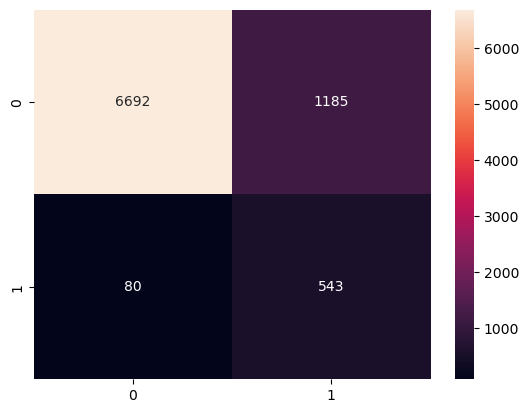

In [96]:
# scores=cross_val_predict(,x_train,y_train,cv=5,method='predict')
score=XGB.predict(x_train)
print(f1_score(scores,y_train),recall_score(scores,y_train),precision_score(scores,y_train))
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [ ]:
sns.heatmap(confusion_matrix(scores,y_train),annot=True,fmt='d')

In [ ]:
from sklearn.model_selection import train_test_split
# Step 1: Create a holdout set
X_train, X_holdout, Y_train, Y_holdout = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Step 2: Select and train base models
XGB1=xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=120)
RanFor_1=RandomForestClassifier(n_estimators=120,max_depth=10, max_features='log2', max_leaf_nodes=14,
                       max_samples=0.8, min_samples_split=6, n_jobs=-1,
                       oob_score=True)

XGB1.fit(X_train,Y_train)
RanFor_1.fit(X_train,Y_train)
poly3 = PolynomialFeatures(degree=3)
df_train_pol3 = poly3.fit_transform(X_train)

mod3LGR=LogisticRegression(C=0.5, max_iter=1000, penalty='l1', solver='liblinear')
mod3LGR.fit(df_train_pol3, Y_train)


# Step 4: Generate predictions from base models
predictions_base1 = XGB1.predict(X_holdout)
predictions_base2 = RanFor_1.predict(X_holdout)
df_test_pol3 = poly3.fit_transform(X_holdout)
base3=mod3LGR.predict(df_test_pol3)
# Step 5: Concatenate predictions
meta_features = np.column_stack((predictions_base1, predictions_base2,base3))




In [ ]:
# Step 6: Train the meta-model
param_grid = {'C': [0.5,1,10,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=1)
svm_grid.fit(meta_features,Y_holdout)
best_model(svm_grid)

In [ ]:
meta_model =SVC(C=0.5, gamma=0.1, probability=True)
meta_model.fit(meta_features, Y_holdout)
df_test_pol3 = poly3.fit_transform(x_test)
base3=mod3LGR.predict(df_test_pol3)
# Step 7: Evaluate the stacked ensemble
meta_features_test = np.column_stack((XGB1.predict(x_test), RanFor_1.predict(x_test),base3))
stacked_predictions = meta_model.predict(meta_features_test)

In [ ]:
stacked_predictions_prob = meta_model.predict_proba(meta_features_test)
stacked_predictions_prob

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have your logistic regression model (log_pol2_Grid) trained and the test data (x_test, y_test)
# Get predicted probabilities for the positive class (class 1)
predicted_probabilities = meta_model.predict_proba(meta_features_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, predicted_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Get predicted probabilities for the training data
predicted_probabilities = meta_model.predict_proba(meta_features_test)

# Choose a custom threshold (e.g., 0.6)
custom_threshold = 0.3

# Apply the custom threshold to get binary predictions
binary_predictions = (predicted_probabilities[:, 1] >= custom_threshold).astype(int)

# Calculate F1 score, recall, and precision using binary predictions
f1 = f1_score(y_test, binary_predictions)
recall = recall_score(y_test, binary_predictions)
precision = precision_score(y_test, binary_predictions)
print(f1,recall,precision)


In [ ]:

sns.heatmap(confusion_matrix(binary_predictions,y_test),annot=True,fmt='d')

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create two continuous numerical features
feature1 = np.array([1, 0,0,0,0])
feature2 = np.array([0,1,0,0,0])

# Combine the features into a 2D array
X = np.column_stack((feature1, feature2))

# Create a PolynomialFeatures transformer for quadratic features (degree=2)
poly = PolynomialFeatures(degree=2)

# Apply polynomial features transformation
X_poly = poly.fit_transform(X)

# Display the original features and the polynomial features
print("Original Features:")
print(X)
print("\nPolynomial Features (Quadratic):")
print(X_poly)
